# Flexible sites in a protein structure

In this example the flexbility of CA atoms in protein structure is displayed: The more flexible a residue is, the redder is its displayed color. The flexibility measure is based on the *root mean square fluctuation* (RMSF).
Although a NMR structure is used here to calculate the RMSF from its multiple states, this script could also be applied to the frames of a molecular dynamics trajectory.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import biotite
import biotite.structure as struc
import biotite.structure.io.mmtf as mmtf
import biotite.database.rcsb as rcsb
import ammolite
from pymol2 import PyMOL


PNG_SIZE = (800, 800)


pymol_app = PyMOL()
pymol_app.start()
ammolite.setup_parameters(pymol_app)
cmd = pymol_app.cmd

In [2]:
# General configuration
cmd.bg_color("white")
cmd.set("cartoon_side_chain_helper", 1)
cmd.set("cartoon_oval_length", 0.8)
cmd.set("depth_cue", 0)
cmd.set("valence", 0)

 PyMOL not running, entering library mode (experimental)


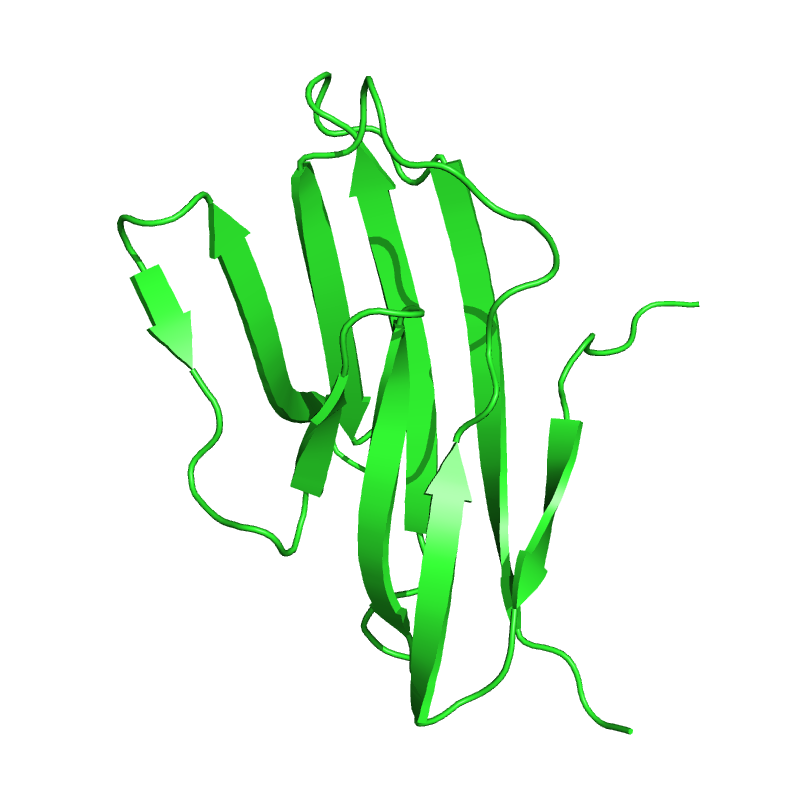

In [3]:
# Fetch and load human CD2 NMR structure and remove glycan
mmtf_file = mmtf.MMTFFile.read(rcsb.fetch("1gya", "mmtf"))
cd2 = mmtf.get_structure(mmtf_file, include_bonds=True)
cd2 = cd2[..., struc.filter_amino_acids(cd2)]

# Push first model to PyMOL
pymol_cd2 = ammolite.PyMOLObject.from_structure(cd2[0], pymol_instance=pymol_app)
ammolite.show(PNG_SIZE, pymol_instance=pymol_app)

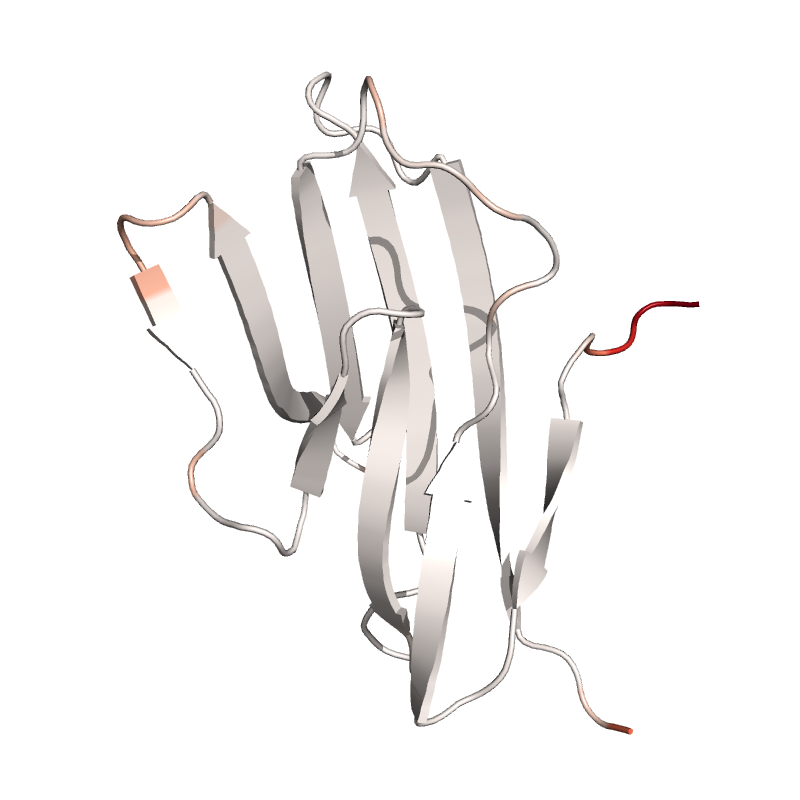

In [4]:
# Use RMSF between NMR models as measure of flexibility
rmsf = struc.rmsf(struc.average(cd2), cd2)
# Use logarithmic scale
log_rmsf = np.log(rmsf)
# Set maximum value for a CA to 1.0
flexibility = log_rmsf / np.max(log_rmsf[cd2.atom_name == "CA"])

# Use a Matplotlib color map for flexibility coloring
# Use discrete color 'steps'
N_COLORS = 20
cmap = plt.get_cmap("Reds")
for threshold_flex in np.linspace(1.0, 0.0, N_COLORS):
    # Discard alpha channel
    color = cmap(threshold_flex)[:3]
    pymol_cd2.color(color, flexibility <= threshold_flex)
ammolite.show(PNG_SIZE, pymol_instance=pymol_app)

In [5]:
pymol_app.stop()